In [17]:
import pandas as pd
import re
import os
import plotly
import plotly.express as px

In [18]:
artists_df = pd.read_csv('artists_10_cleaned.csv', index_col=0)

In [19]:
artists_df.sample(5)

,Artist,Song Title,Song Lyrics,Artist Image
113,Kendrick Lamar,The Blacker the Berry,"everything black, i don't want black they want...",https://images.genius.com/d6d96651b423fa5a83c3...
155,Nas,Daughters,92 contributorsdaughters lyrics check it out ...,https://images.genius.com/23061dd2dc7e863127db...
11,2Pac,I Ain’t Mad At Cha,"change, shit i guess change is good for any of...",https://images.genius.com/46cb64bfbd6e4b6e247a...
42,Ice Cube,Gangsta Rap Made Me Do It,92 contributorsgangsta rap made me do it lyric...,https://images.genius.com/ad69cae78eaa818e5728...
77,JAY-Z,Song Cry,102 contributorssong cry lyrics picture all th...,https://images.genius.com/dab4680bbb0569024ef3...


In [20]:
artists_df_grouped = artists_df.groupby(['Artist'])

In [21]:
tupac_df = artists_df_grouped.get_group('2Pac').head()

In [22]:
tupac_df.head()

,Artist,Song Title,Song Lyrics,Artist Image
0,2Pac,Hit ’Em Up,sucka-ass i ain't got no mothafuckin' friends ...,https://images.genius.com/46cb64bfbd6e4b6e247a...
1,2Pac,Changes,"ooh, yeah ooh come on, come on i see no chang...",https://images.genius.com/46cb64bfbd6e4b6e247a...
2,2Pac,Keep Ya Head Up,257 contributorskeep ya head up lyrics little ...,https://images.genius.com/46cb64bfbd6e4b6e247a...
3,2Pac,Hail Mary,"makaveli in this, killuminati all through your...",https://images.genius.com/46cb64bfbd6e4b6e247a...
4,2Pac,Dear Mama,"you are appreciated when i was young, me and ...",https://images.genius.com/46cb64bfbd6e4b6e247a...


In [23]:
tupac_word_counts = tupac_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_24956\1254807709.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tupac_word_counts = tupac_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1254807709.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tupac_word_counts = tupac_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1254807709.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tupac_word_counts = tupac_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1254807709.py:1: FutureWar

In [27]:
tupac_word_counts[:40]

you              148.0
the              194.0
we                74.0
and              101.0
take              29.0
a                 90.0
i                114.0
fuck              20.0
money             21.0
to               104.0
your              30.0
with              37.0
on                43.0
in                41.0
when              33.0
of                27.0
niggas            14.0
all               26.0
but               31.0
ain't             28.0
it                64.0
my                53.0
know              20.0
i'm               24.0
up                34.0
see               27.0
get               24.0
be                28.0
they              25.0
bad                8.0
now               16.0
is                45.0
'em               14.0
for               29.0
don't             30.0
let               13.0
how               13.0
hit                6.0
little            11.0
motherfuckin'      6.0
dtype: float64

In [25]:
type(tupac_word_counts)

pandas.core.series.Series

In [33]:
COMMON_WORDS = ['the', 'and', 'a', 'to', 'with',
                'on', 'in', 'when', 'of', 'but',
                'it', 'is', 'for', 'it\'s']
# 'we', 'you', 'i' could give us some unsights into who the lyrics are focused on

In [46]:
exclude_words = tupac_word_counts.index.isin(COMMON_WORDS)
tupac_word_counts_uncommon = tupac_word_counts[~exclude_words]

In [35]:
tupac_word_counts_uncommon[:40]

you              148.0
we                74.0
take              29.0
i                114.0
fuck              20.0
money             21.0
your              30.0
niggas            14.0
all               26.0
ain't             28.0
my                53.0
know              20.0
i'm               24.0
up                34.0
see               27.0
get               24.0
be                28.0
they              25.0
bad                8.0
now               16.0
'em               14.0
don't             30.0
let               13.0
how               13.0
hit                6.0
little            11.0
motherfuckin'      6.0
nigga,            13.0
ya                21.0
as                14.0
got               20.0
out               14.0
boy                5.0
no                24.0
up!                5.0
our               14.0
this              21.0
do                23.0
us                 9.0
or                13.0
dtype: float64

In [48]:
tupac_word_counts_common = tupac_word_counts_uncommon[tupac_word_counts_uncommon>5]

In [49]:
len(tupac_word_counts_common)

132

In [58]:
word_counts_df = pd.DataFrame(columns=tupac_word_counts_common.index)

In [59]:
word_counts_df

,you,we,take,i,fuck,money,your,niggas,all,ain't,...,"da-da,","da,",now?,die?,"quick,","la,","lady,",sweet,appreciated,ya?


In [62]:
tupac_word_counts_common.values

array([148.,  74.,  29., 114.,  20.,  21.,  30.,  14.,  26.,  28.,  53.,
        20.,  24.,  34.,  27.,  24.,  28.,  25.,   8.,  16.,  14.,  30.,
        13.,  13.,   6.,  11.,   6.,  13.,  21.,  14.,  20.,  14.,  24.,
        14.,  21.,  23.,   9.,  13.,   9.,  36.,  11.,   6.,   8.,  14.,
        16.,   8.,   9.,  15.,   6.,  10.,  14.,   6.,   9.,   7.,  18.,
        13.,   7.,  13.,  21.,  41.,   7.,   9.,  23.,   6.,  27.,   6.,
         6.,  10.,  19.,   9.,   6.,  10.,  13.,  12.,  15.,   6.,  13.,
        10.,   8.,  12.,  12.,   7.,   7.,  10.,  21.,   7.,  25.,   6.,
         7.,  10.,  15.,  10.,   7.,  11.,   7.,   6.,  10.,   7.,   7.,
         7.,   6.,  16.,   6.,  12.,   7.,  10.,  17.,   6.,  14.,  17.,
         8.,   6.,   6.,   8.,   6.,   7.,   7.,   6.,  15.,  11.,   8.,
         8.,   8.,   8.,   7.,   7.,   7.,   6.,  11.,   8.,   7.,   6.])

In [63]:
word_counts_df.loc['2Pac'] = tupac_word_counts_common.values

In [64]:
word_counts_df

,you,we,take,i,fuck,money,your,niggas,all,ain't,...,"da-da,","da,",now?,die?,"quick,","la,","lady,",sweet,appreciated,ya?
2Pac,148.0,74.0,29.0,114.0,20.0,21.0,30.0,14.0,26.0,28.0,...,8.0,8.0,7.0,7.0,7.0,6.0,11.0,8.0,7.0,6.0


In [65]:
nas_df = artists_df_grouped.get_group('Nas').head()
nas_count = nas_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
exclude_words = nas_count.index.isin(COMMON_WORDS)
nas_uncommon = nas_count[~exclude_words]
nas_common = nas_uncommon[nas_uncommon>5]

C:\Users\User\AppData\Local\Temp\ipykernel_24956\1122348535.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  nas_count = nas_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1122348535.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  nas_count = nas_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1122348535.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  nas_count = nas_df['Song Lyrics'].apply(lambda x: pd.value_counts(x.split())).sum(axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_24956\1122348535.py:2: FutureWarning: value_counts with argume

In [66]:
nas_common[:20]

i         88.0
new       13.0
my        73.0
i'm       32.0
state     10.0
york      11.0
mind      11.0
like      25.0
niggas    18.0
you       97.0
be        17.0
up        19.0
was       18.0
never     17.0
as        11.0
your      28.0
back      10.0
just       7.0
me        19.0
some       9.0
dtype: float64

In [67]:
word_counts_df.loc['Nas'] = nas_common.values

ValueError: cannot set a row with mismatched columns

In [70]:
nas_common_df = nas_common.to_frame().T

In [74]:
nas_common_df.index = ['Nas']

In [76]:
word_counts_df = pd.concat([word_counts_df, nas_common_df], axis=0)

In [78]:
word_counts_df.fillna(0)

,you,we,take,i,fuck,money,your,niggas,all,ain't,...,across,bitch,life's,"die,",world,yours,"mine,",this?,mine—whose,"yours,"
2Pac,148.0,74.0,29.0,114.0,20.0,21.0,30.0,14.0,26.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nas,97.0,18.0,0.0,88.0,11.0,0.0,28.0,18.0,13.0,16.0,...,6.0,11.0,10.0,8.0,45.0,38.0,30.0,17.0,15.0,11.0


### TODO: Do this process for every group / artist and create new DF of all artists and ther most common words with counts

In [79]:
import plotly.express as px

In [90]:
fig = px.bar(word_counts_df.iloc[:, :10], y=word_counts_df.iloc[:, :10].columns)

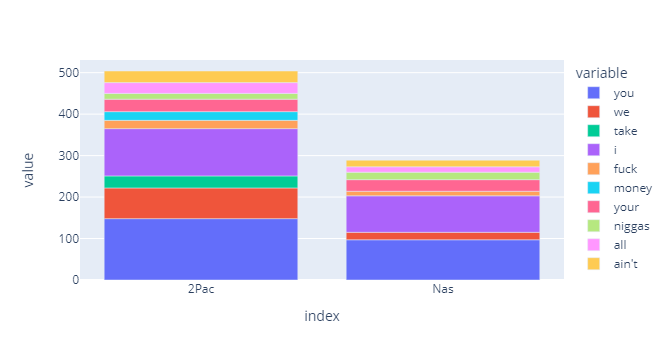

In [88]:
fig.show()